<a href="https://colab.research.google.com/github/engineerchacon/Procesamiento-de-Lenguaje-Natural/blob/main/An%C3%A1lisis_de_texto_Armando_Chac%C3%B3n_Terrazas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de texto-Armando Chacón Terrazas**

Analice el siguiente texto y aplique las técnicas de PLN que crea necesarias (nube de palabras, gráficas, lemas, stopwords, limpieza, etc.).
 Instale las librearías necesarias. Desarrolle su script de Python implementando el código en funciones. Describa el efecto de las técnicas utilizadas al ser aplicadas al texto al ser procesado.

## **1. IMPORTAR LIBRERÍAS**

In [10]:
import re                      # Expresiones regulares (buscar y reemplazar texto)
import string                  # Lista de signos de puntuación
import unicodedata             # Eliminar acentos
import matplotlib.pyplot as plt
from collections import Counter

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Descargar stopwords en español
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **2. DEFINIR EL TEXTO ORIGINAL**

In [11]:
texto = """
En el Congreso Internacional de Inteligencia Artificial 2025 se discutieron avances muy importantes.
@Maria comentó que la ética de la IA debe estar siempre en el centro de las investigaciones.
Puedes leer más en http://ia-congreso2025.org o enviar tus dudas al correo contacto@ia2025.org.
El Dr. Pérez afirmó: "¡La innovación no se detiene!". #InteligenciaArtificial #ÉticaDigital
Además, varios expertos señalaron que la inteligencia artificial, la inteligencia artificial
y la inteligencia artificial aparecen repetidamente en los debates académicos.
"""

print("TEXTO ORIGINAL:")
print(texto)

TEXTO ORIGINAL:

En el Congreso Internacional de Inteligencia Artificial 2025 se discutieron avances muy importantes.
@Maria comentó que la ética de la IA debe estar siempre en el centro de las investigaciones.
Puedes leer más en http://ia-congreso2025.org o enviar tus dudas al correo contacto@ia2025.org.
El Dr. Pérez afirmó: "¡La innovación no se detiene!". #InteligenciaArtificial #ÉticaDigital
Además, varios expertos señalaron que la inteligencia artificial, la inteligencia artificial
y la inteligencia artificial aparecen repetidamente en los debates académicos.



# **3. FUNCIONES DE PREPROCESAMIENTO**

In [12]:
def convertir_a_minusculas(texto):
    """
    Convierte todo el texto a minúsculas.
    """
    return texto.lower()

def eliminar_urls_menciones_hashtags(texto):
    """
    Elimina:
      - URLs (direcciones web)
      - menciones (@usuario)
      - hashtags (#tema)
    porque en muchos análisis no aportan significado al contenido del texto.
    """
    if not isinstance(texto, str):
        return ""

    # Quitar URLs que empiezan con http, https o www
    texto = re.sub(r'http\S+|www\S+', ' ', texto)

    # Quitar menciones tipo @Maria
    texto = re.sub(r'@\w+', ' ', texto)

    # Quitar hashtags tipo #InteligenciaArtificial
    texto = re.sub(r'#\w+', ' ', texto)

    return texto

def eliminar_formato_markdown(texto):
    """
    Si el texto tuviera enlaces en formato Markdown, usaría [ ] y ( ).
    Aquí simplemente quitamos esos caracteres por si aparecen.
    """
    texto = texto.replace('[', ' ').replace(']', ' ')
    texto = texto.replace('(', ' ').replace(')', ' ')
    return texto

def eliminar_puntuacion(texto):
    """
    Elimina signos de puntuación.
    Ejemplo: 'hola, ¿cómo estás?' -> 'hola cómo estás'
    """
    tabla = str.maketrans('', '', string.punctuation + "¿¡«»“”")
    return texto.translate(tabla)

def eliminar_acentos(texto):
    """
    Elimina acentos de las letras.
    Ejemplo: 'ética' -> 'etica'
    """
    texto_norm = unicodedata.normalize('NFD', texto)
    texto_sin_acentos = ''.join(
        c for c in texto_norm
        if unicodedata.category(c) != 'Mn'
    )
    return texto_sin_acentos

# Crear conjunto de stopwords en español
stopwords_es = set(stopwords.words('spanish'))
# Añadir algunas palabras poco informativas
stopwords_es.update(['mas', 'muy', 'si', 'aun'])

def tokenizar_y_filtrar(texto):
    """
    Divide el texto en palabras (tokens) y se queda solo con las relevantes:
      - Solo letras (sin números)
      - Más de 2 caracteres
      - Que no sean stopwords (palabras vacías)
    """
    tokens = texto.split()

    palabras_limpias = [
        palabra for palabra in tokens
        if palabra.isalpha()
        and len(palabra) > 2
        and palabra not in stopwords_es
    ]
    return palabras_limpias

def preprocesar_texto(texto):
    """
    Aplica todos los pasos de normalización al texto:
      1) Minúsculas
      2) Quitar posibles marcas Markdown
      3) Quitar URLs, menciones y hashtags
      4) Quitar signos de puntuación
      5) Quitar acentos
      6) Tokenizar y eliminar stopwords
    Devuelve una lista de palabras limpias.
    """
    if not isinstance(texto, str):
        return []

    texto = convertir_a_minusculas(texto)
    texto = eliminar_formato_markdown(texto)
    texto = eliminar_urls_menciones_hashtags(texto)
    texto = eliminar_puntuacion(texto)
    texto = eliminar_acentos(texto)
    palabras = tokenizar_y_filtrar(texto)

    return palabras

# **4. APLICAR PREPROCESAMIENTO**

In [13]:
palabras_limpias = preprocesar_texto(texto)

print("\nPALABRAS DESPUÉS DEL PREPROCESAMIENTO:")
print(palabras_limpias)
print("\nTotal de palabras limpias:", len(palabras_limpias))
print("Palabras únicas:", len(set(palabras_limpias)))


PALABRAS DESPUÉS DEL PREPROCESAMIENTO:
['congreso', 'internacional', 'inteligencia', 'artificial', 'discutieron', 'avances', 'importantes', 'comento', 'etica', 'debe', 'siempre', 'centro', 'investigaciones', 'puedes', 'leer', 'enviar', 'dudas', 'correo', 'contacto', 'org', 'perez', 'afirmo', 'innovacion', 'detiene', 'ademas', 'varios', 'expertos', 'senalaron', 'inteligencia', 'artificial', 'inteligencia', 'artificial', 'inteligencia', 'artificial', 'aparecen', 'repetidamente', 'debates', 'academicos']

Total de palabras limpias: 38
Palabras únicas: 32


# **5. FRECUENCIAS Y TOP 20**

In [14]:
contador = Counter(palabras_limpias)
top20 = contador.most_common(20)   # si hay menos de 20, toma las que haya

print("\nTop de palabras más frecuentes:")
for i, (pal, freq) in enumerate(top20, start=1):
    print(f"{i:2d}. {pal:15s} -> {freq:2d} veces")

palabras = [p for p, f in top20]
frecuencias = [f for p, f in top20]


Top de palabras más frecuentes:
 1. inteligencia    ->  4 veces
 2. artificial      ->  4 veces
 3. congreso        ->  1 veces
 4. internacional   ->  1 veces
 5. discutieron     ->  1 veces
 6. avances         ->  1 veces
 7. importantes     ->  1 veces
 8. comento         ->  1 veces
 9. etica           ->  1 veces
10. debe            ->  1 veces
11. siempre         ->  1 veces
12. centro          ->  1 veces
13. investigaciones ->  1 veces
14. puedes          ->  1 veces
15. leer            ->  1 veces
16. enviar          ->  1 veces
17. dudas           ->  1 veces
18. correo          ->  1 veces
19. contacto        ->  1 veces
20. org             ->  1 veces


# **6. GRÁFICA DE BARRAS**

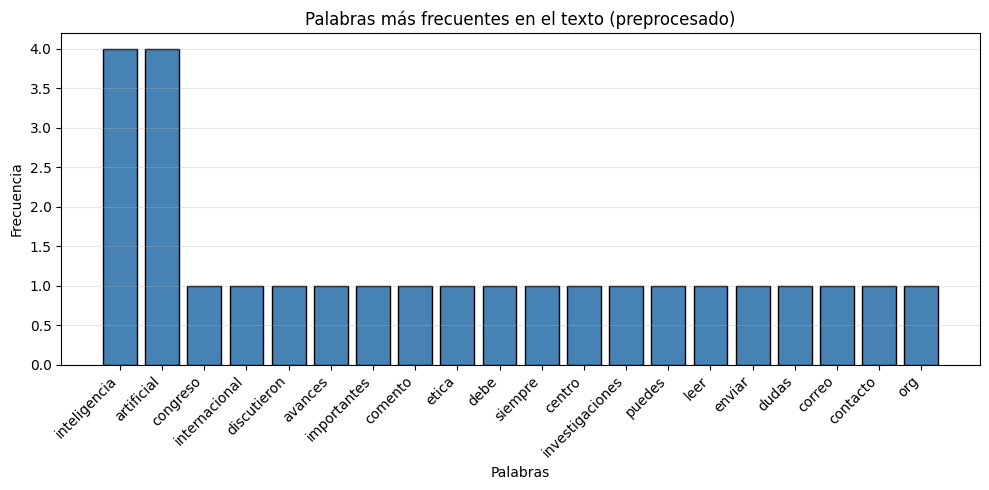

In [15]:
plt.figure(figsize=(10, 5))
plt.bar(palabras, frecuencias, color='steelblue', edgecolor='black')
plt.title('Palabras más frecuentes en el texto (preprocesado)')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# **7. NUBE DE PALABRAS**

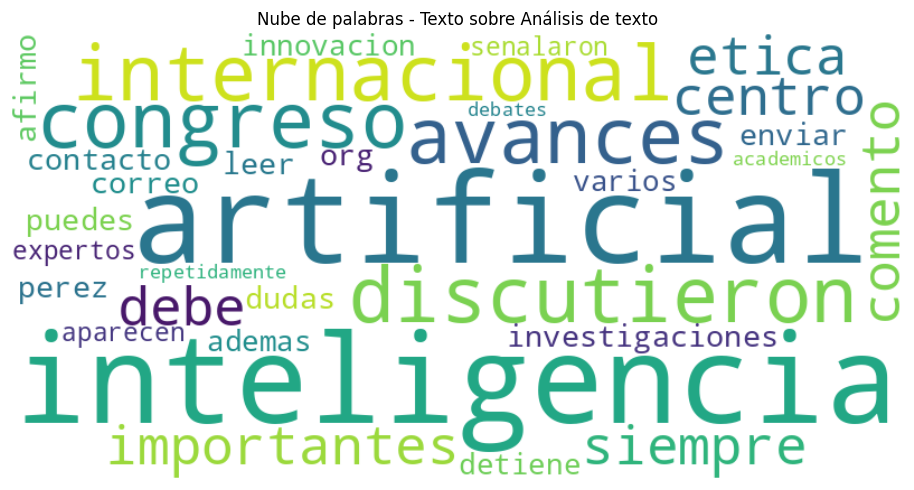

In [16]:
texto_nube = " ".join(palabras_limpias)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    colormap='viridis'
).generate(texto_nube)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras - Texto sobre Análisis de texto')
plt.tight_layout()
plt.show()